In [1]:
library(dplyr)
library(ggplot2)
library(Seurat)
library(presto)
library(motifmatchr)
library(qlcMatrix)
library(scCustomize)
library(RColorBrewer)
library(ggrepel)
library(patchwork)
library(tidydr)
library(GenomicRanges)
library(Signac)
library(zoo)
library(ComplexHeatmap)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats�?:

    filter, lag


The following objects are masked from ‘package:base�?:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base�?:

    intersect, t




Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr�?:

    between, first, last


Loading required package: Matrix


Attaching package: ‘Matrix’


The following object is masked from ‘package:TFBSTools�?:

    Matrix


Loading required package: slam


Attaching package: ‘slam’


The following object is masked from ‘package:data.table�?:

    rollup


Loading required package: sparsesvd

scCustomize v2.1.2
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/

# Pseudobulk average gene expression

### bulk gene expression

* early（E13、E14)，later（E15、E16、E18�? bulk gene expression 

In [2]:
# Load data ####
seu_rna <- readRDS('./03_Skin/RNA/Mskin_rna.rds')

In [3]:
seu_rna

An object of class Seurat 
28250 features across 64408 samples within 1 assay 
Active assay: RNA (28250 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap

In [4]:
tail(seu_rna)

,orig.ident,nCount_RNA,nFeature_RNA,batch,percent.mt,percent.ribo,percent_mito,percent_ribo,percent_mito_ribo,log10GenesPerUMI,outlier,scDblFinder.class,scDblFinder.score,RNA_snn_res.0.1,RNA_snn_res.0.3,RNA_snn_res.0.5,seurat_clusters,predicted.id,celltype
,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>
E18_HX2_BC5460_N01,E18_HX2,1426.253,917,E18_HX2,1.5107420,2.485284,1.5107420,2.485284,3.996026,0.9391834,FALSE,singlet,0.031283483,0,0,1,1,Basal,Basal
E18_HX2_BC5492_N01,E18_HX2,654.208,531,E18_HX2,0.3788481,1.361944,0.3788481,1.361944,1.740793,0.9678159,FALSE,singlet,0.001901718,0,0,1,1,Basal,Basal
E18_HX2_BC5507_N02,E18_HX2,1334.299,702,E18_HX2,0.4497725,1.452900,0.4497725,1.452900,1.902673,0.9107541,FALSE,singlet,0.044208925,1,1,5,5,Fibroblasts,Fibroblasts
E18_HX2_BC5528_N01,E18_HX2,5265.546,2688,E18_HX2,0.6162634,1.071963,0.6162634,1.071963,1.688226,0.9215320,FALSE,singlet,0.215381861,1,3,4,4,Fibroblasts,Fibroblasts
E18_HX2_BC5539_N01,E18_HX2,2780.803,1433,E18_HX2,0.5433297,1.326092,0.5433297,1.326092,1.869422,0.9164025,FALSE,singlet,0.044771187,2,2,3,3,Spinous,Spinous
E18_HX2_BC5555_N02,E18_HX2,3612.518,2256,E18_HX2,1.0986011,1.088525,1.0986011,1.088525,2.187126,0.9425290,FALSE,singlet,0.018728366,0,0,1,1,Basal,Basal
E18_HX2_BC5560_N01,E18_HX2,2936.072,1988,E18_HX2,0.3819117,1.542769,0.3819117,1.542769,1.924681,0.9511645,FALSE,singlet,0.072438329,0,0,1,1,Basal,Basal
E18_HX2_BC5578_N02,E18_HX2,1794.741,1126,E18_HX2,0.6569658,1.490325,0.6569658,1.490325,2.147291,0.9377802,FALSE,singlet,0.175170630,9,11,14,14,Schwann,Schwann
E18_HX2_BC5639_N02,E18_HX2,1713.290,1058,E18_HX2,0.2025654,1.356956,0.2025654,1.356956,1.559521,0.9352640,FALSE,singlet,0.080299780,0,0,1,1,Basal,Basal


In [5]:
c#add stage
seu_rna@meta.data$stage <- sapply(strsplit(seu_rna$orig.ident,"_"), "[", 1)
#add early or later
seu_rna$period <- ifelse(seu_rna$stage %in% c('E13', 'E14'), 'early',
                     ifelse(seu_rna$stage %in% c('E15', 'E16', 'E18'), 'later', ''))
Idents(seu_rna) <- "period"
seu_rna@active.ident

E13_HU1_BC0077_N02   E13_HU1_BC0125_N01   E13_HU1_BC0143_N03 
               early                early                early 
  E13_HU1_BC0146_N02   E13_HU1_BC0156_N01   E13_HU1_BC0158_N02 
               early                early                early 
  E13_HU1_BC0167_N03   E13_HU1_BC0177_N02   E13_HU1_BC0214_N02 
               early                early                early 
  E13_HU1_BC0220_N01   E13_HU1_BC0226_N01   E13_HU1_BC0227_N02 
               early                early                early 
  E13_HU1_BC0228_N01   E13_HU1_BC0232_N01   E13_HU1_BC0239_N02 
               early                early                early 
  E13_HU1_BC0253_N01   E13_HU1_BC0266_N01   E13_HU1_BC0267_N01 
               early                early                early 
  E13_HU1_BC0271_N02   E13_HU1_BC0273_N03   E13_HU1_BC0276_N02 
               early                early                early 
  E13_HU1_BC0277_N04   E13_HU1_BC0284_N02   E13_HU1_BC0291_N02 
               early                early                early 
  E13_HU1_BC0309_N01   E13_HU1_BC0311_N01   E13_HU1_BC0323_N01 
               early                early                early 
  E13_HU1_BC0325_N02   E13_HU1_BC0331_N02   E13_HU1_BC0333_N01 
               early                early                early 
  E13_HU1_BC0341_N03   E13_HU1_BC0354_N01   E13_HU1_BC0357_N01 
               early                early                early 
  E13_HU1_BC0379_N02   E13_HU1_BC0380_N03   E13_HU1_BC0385_N01 
               early                early                early 
  E13_HU1_BC0398_N01   E13_HU1_BC0399_N01   E13_HU1_BC0411_N03 
               early                early                early 
  E13_HU1_BC0412_N01   E13_HU1_BC0415_N02   E13_HU1_BC0417_N01 
               early                early                early 
  E13_HU1_BC0418_N04   E13_HU1_BC0428_N01   E13_HU1_BC0434_N04 
               early                early                early 
  E13_HU1_BC0435_N01   E13_HU1_BC0442_N01   E13_HU1_BC0444_N01 
               early                early                early 
  E13_HU1_BC0446_N03   E13_HU1_BC0448_N01   E13_HU1_BC0449_N02 
               early                early                early 
  E13_HU1_BC0455_N02   E13_HU1_BC0456_N03   E13_HU1_BC0461_N01 
               early                early                early 
  E13_HU1_BC0463_N02   E13_HU1_BC0467_N05   E13_HU1_BC0468_N03 
               early                early                early 
  E13_HU1_BC0469_N02   E13_HU1_BC0474_N03   E13_HU1_BC0475_N02 
               early                early                early 
  E13_HU1_BC0480_N04   E13_HU1_BC0483_N01   E13_HU1_BC0484_N02 
               early                early                early 
  E13_HU1_BC0485_N02   E13_HU1_BC0489_N02   E13_HU1_BC0493_N02 
               early                early                early 
  E13_HU1_BC0496_N03   E13_HU1_BC0498_N02   E13_HU1_BC0503_N01 
               early                early                early 
  E13_HU1_BC0510_N01   E13_HU1_BC0514_N01   E13_HU1_BC0515_N01 
               early                early                early 
  E13_HU1_BC0522_N01   E13_HU1_BC0523_N02   E13_HU1_BC0526_N02 
               early                early                early 
  E13_HU1_BC0528_N02   E13_HU1_BC0539_N01   E13_HU1_BC0541_N05 
               early                early                early 
  E13_HU1_BC0550_N03   E13_HU1_BC0551_N02   E13_HU1_BC0559_N03 
               early                early                early 
  E13_HU1_BC0560_N02   E13_HU1_BC0563_N01   E13_HU1_BC0567_N01 
               early                early                early 
  E13_HU1_BC0569_N03   E13_HU1_BC0573_N02   E13_HU1_BC0575_N01 
               early                early                early 
  E13_HU1_BC0578_N02   E13_HU1_BC0579_N01   E13_HU1_BC0581_N01 
               early                early                early 
  E13_HU1_BC0584_N02   E13_HU1_BC0586_N02   E13_HU1_BC0592_N02 
               early                early                early 
  E13_HU1_BC0600_N01   E13_HU1_BC0

In [6]:
# early vs later
period.markers <- FindMarkers(seu_rna, ident.1 = "early", ident.2 = "later", only.pos = FALSE, min.pct = 0.1, logfc.threshold = 0)

In [7]:
head(period.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Krt1,0,-6.163541,0.070,0.753,0
Krt10,0,-5.341094,0.083,0.734,0
Krtdap,0,-3.601084,0.094,0.613,0
Dmkn,0,-3.512558,0.085,0.570,0
Cpa3,0,-2.422052,0.221,0.665,0
Ctnna2,0,3.080872,0.583,0.143,0


In [8]:
dim(period.markers)

[1] 5972    5

In [9]:
up20 <- period.markers %>% dplyr::slice_max(avg_log2FC,n = 100)
down20 <- period.markers %>% dplyr::slice_min(avg_log2FC,n = 100)

In [10]:
early_vs_later_100 = data.frame(early=rownames(up20),later=rownames(down20))

In [11]:
early_vs_later_100

early,later
<chr>,<chr>
Col2a1,Hrnr
Gabrp,Stfa3
Dcx,Calm4
Snhg11,Ly6d
Col9a1,Cstdc5
Spock3,Krt1
Rimklb,Stfa1
Col11a1,Lor
Unc5c,Krt10


In [12]:
# write.table(up20,"./03_Skin/skin_early_vs_later_up100.tsv",row.names=TRUE,col.names=TRUE,sep="\t")
# write.table(down20,"./03_Skin/skin_early_vs_later_down100.tsv",row.names=TRUE,col.names=TRUE,sep="\t")

In [13]:
# early & later counts
seu_bulk_early <- seu_rna@assays$RNA@counts[, grep("E13|E14", colnames(seu_rna@assays$RNA@counts))]
seu_bulk_later <- seu_rna@assays$RNA@counts[, grep("E15|E16|E18", colnames(seu_rna@assays$RNA@counts))]
seu_bulk <- data.frame(early = Matrix::rowSums(seu_bulk_early),
                        later = Matrix::rowSums(seu_bulk_later))
seu_bulk <- log2(seu_bulk+1)
head(seu_bulk)
# write.csv(seu_bulk,"./03_Skin/Mskin_early_vs_later.csv",row.names=TRUE)

,early,later
,<dbl>,<dbl>
Xkr4,14.049769,12.336778
Gm1992,9.005063,7.669186
Gm19938,8.193951,6.586369
Rp1,9.876767,9.913629
Gm37381,7.729211,8.075806
Sox17,7.770596,8.080839


In [14]:
# early & later counts
seu_bulk_E13 <- seu_rna@assays$RNA@counts[, grep("E13", colnames(seu_rna@assays$RNA@counts))]
seu_bulk_E14 <- seu_rna@assays$RNA@counts[, grep("E14", colnames(seu_rna@assays$RNA@counts))]
seu_bulk_E15 <- seu_rna@assays$RNA@counts[, grep("E15", colnames(seu_rna@assays$RNA@counts))]
seu_bulk_E16 <- seu_rna@assays$RNA@counts[, grep("E16", colnames(seu_rna@assays$RNA@counts))]
seu_bulk_E18 <- seu_rna@assays$RNA@counts[, grep("E18", colnames(seu_rna@assays$RNA@counts))]
seu_bulk_batch <- data.frame(E13 = Matrix::rowSums(seu_bulk_E13),
                       E14 = Matrix::rowSums(seu_bulk_E14),
                       E15 = Matrix::rowSums(seu_bulk_E15),
                       E16 = Matrix::rowSums(seu_bulk_E16),
                       E18 = Matrix::rowSums(seu_bulk_E18))
seu_bulk_batch <- log2(seu_bulk_batch+1)
seu_bulk_batch

,E13,E14,E15,E16,E18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xkr4,13.255403,12.810075,11.172425,10.993086,9.694821
Gm1992,8.360981,7.539309,6.870704,6.066343,4.426474
Gm19938,7.117029,7.276315,5.547221,5.380584,3.273995
Rp1,8.381455,9.247175,8.407180,8.840973,7.396206
Gm37381,6.158341,7.147362,6.652193,6.739066,6.009203
Sox17,6.909683,6.631283,7.061869,5.771050,6.401512
Gm37587,6.182724,7.386454,7.689630,6.133932,5.728526
Gm37323,1.522210,2.497771,2.811789,1.529253,0.000000
Lypla1,10.869995,10.712782,10.836900,9.815709,9.167661


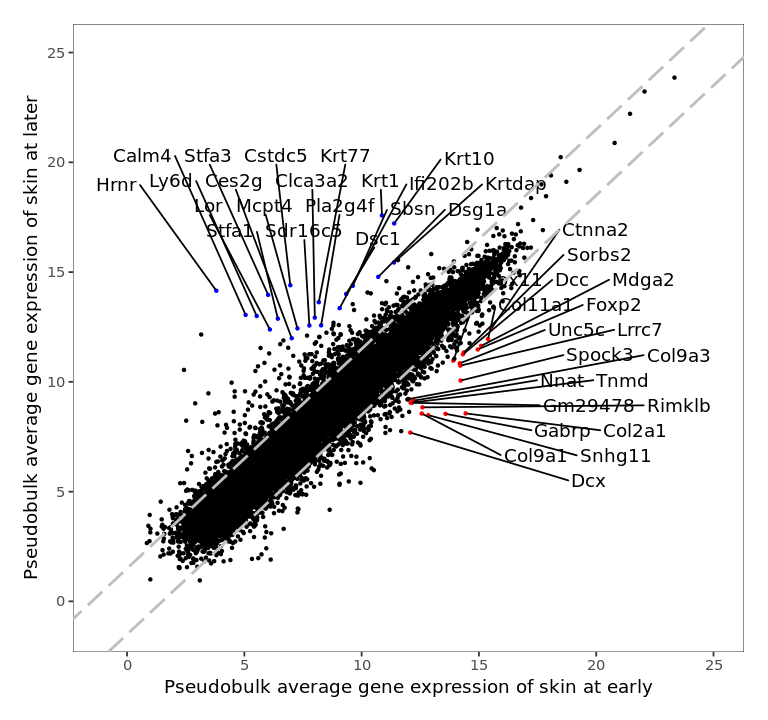

In [15]:
options(repr.plot.height = 6, repr.plot.width = 6.4)
data <- data.frame(
  gene = seu_bulk[,0],
  x = seu_bulk[,1],
  y = seu_bulk[,2],
  type = ifelse(rownames(seu_bulk) %in% rownames(up20), "up20", ifelse(rownames(seu_bulk) %in% rownames(down20), "down20", "other"))
)
up = subset(data, type %in% c("up20"))
down = subset(data, type %in% c("down20"))
p1=ggplot(data, aes(x = x, y = y, color = type)) +
  geom_point(size = 0.6) + scale_color_manual(values = c("up20" = "red", "down20" = "blue", "other" = "black")) +
  xlim(-1, 25) + ylim(-1, 25) + labs(x = "Pseudobulk average gene expression of skin at early", y = "Pseudobulk average gene expression of skin at later") +
  theme(legend.position = 'none', panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(color="black", fill = NA,size=.25),
        plot.title = element_text(size = 15, face = "bold"), plot.margin = unit(c(1,1,1,1), "lines"))+
  geom_text_repel(data=up, aes(label= rownames(up)),  nudge_x = 20-up$x, nudge_y =1.3 * (up$y-9), color = 'black',force=1) +
  geom_text_repel(data=down, aes(label= rownames(down)),max.overlaps = 25, nudge_x = down$x-8, nudge_y =19-down$y, color = 'black',force=1)+
  geom_abline(intercept = 1.5, slope = 1, color = "grey", linetype = "longdash", size = 0.8) +
  geom_abline(intercept = -1.5, slope = 1, color = "grey", linetype = "longdash", size = 0.8)
p1
# ggsave("./03_Skin/skin_early_vs_later_gene_expression.pdf", p1, width = 6.4, height = 6, dpi=600)